## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**0. Load seaborn dataset "tips"**

In [340]:
df = sns.load_dataset("tips")
#df.to_csv("/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/data_sets/tips_seaborn.csv") - ejecutado solo una vez para guardar en mis datasets
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


LA COLUMNA SEX SIGNIFICA QUIEN PAGO LA CUENTA

LA COLUMNA SIZE SIGNIFICA EL NUMERO DE COMENSALES POR CUENTA

**IMPRIME INFORMACIÓN GENERAL DEL DATAFRAME**

In [341]:
print(df.isnull().sum(), "\n")
print("Shape:",df.shape, "\n")
print("Columns:",df.columns, "\n")
print(df.info(), "\n")
print(df.sum(axis = 0))

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64 

Shape: (244, 7) 

Columns: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None 

total_bill    4827.77
tip            731.58
size           627.00
dtype: float64


**IMPRIME LOS VALORES UNICOS DE LAS COLUMNAS 'sex', 'smoker', 'day', 'time', 'size' POR CONSIDERARSE VALORES UNICOS (CATEGORICAL) - EXCEPTO SIZE PERO POR CONOCER LOS VALORES FRECUENTES DE COMENSALES POR MESA:**

In [342]:
print(df["day"].unique(), "\n")
print(df["smoker"].unique(), "\n")
print(df["day"].unique(), "\n")
print(df["time"].unique(), "\n")
print(df["size"].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'] 

['No', 'Yes']
Categories (2, object): ['Yes', 'No'] 

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun'] 

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner'] 

[2 3 4 1 6 5]


**YA QUE DETECTE ALGUNAS COLUMNAS CON TIPO CATEGORY, UTILIZO UNA FUNCION PARA UN ANALISIS DESCRIPTIVO DE LAS CATEGORIAS**

In [343]:
df.describe(include=['category']) #To select pandas categorical columns, use 'category'

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


**1. What is the prefered day for eating?**

**PRIMERO AGRUPO Y OBTENGO NUEVAS DATAFRAME PARA GRAFICAR**

In [344]:
comensales = df.groupby(["day"])["size"].sum().reset_index()
comensales["%_occp_sem"] = round(comensales["size"] / comensales["size"].sum() * 100, 2)
comensales

,day,size,%_occp_sem
0,Thur,152,24.24
1,Fri,40,6.38
2,Sat,219,34.93
3,Sun,216,34.45


**MATPLOTLIB - plt.plot()**

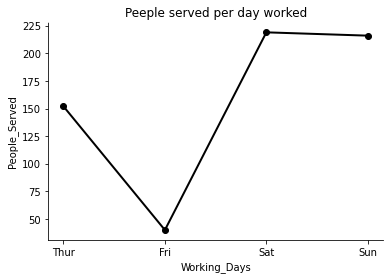

In [345]:
ax = plt.axes() # para poder cambiar el estilo de los ejes

plt.plot(comensales["day"], # eje x
         comensales["size"], # eje y
         color = "black", # para cambiar el color de la línea
         linewidth = 2, # para cambiar el grosor de la línea
         marker = "o"); # para poner los marcadores en nuestra línea
ax.spines['top'].set_color('white') # color del eje de arriba
ax.spines['right'].set_color('white') # color del eje de la derecha
plt.xlabel("Working_Days") # para poner etiqueta en el eje x
plt.ylabel("People_Served") # para poner etiqueta en el eje y
plt.title("Peeple served per day worked") # para poner el título

plt.show();

**SEABORN - sns.lineplot()**

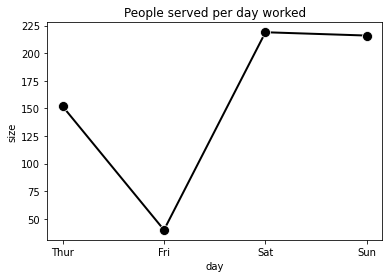

In [346]:
figura = sns.lineplot(data = comensales, x = "day", y = "size",
                    color = "black",
                    marker = "o",
                    markersize = 10, # para cambiar el tamaño del marcador
                   linewidth = 2); # anchura de la línea
figura.set_title("People served per day worked")

plt.show();

**MATPLOTLIB - plt.pie()**

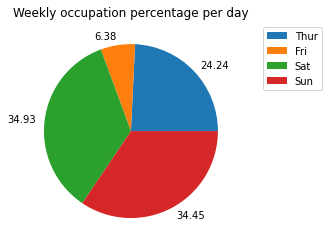

In [347]:
plt.pie(comensales['size'], labels = comensales["%_occp_sem"]);
plt.title("Weekly occupation percentage per day") # para poner el título
plt.legend(comensales["day"], bbox_to_anchor=(1.4, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

**3. Do you think bill amounts change considerably depending on smoking?**

**PRIMERO AGRUPO Y OBTENGO NUEVAS DATAFRAME PARA GRAFICAR**

In [348]:
fumadores = df.groupby(["smoker"])["total_bill"].sum().reset_index()
fumadores["billing_%"] = round(fumadores["total_bill"] / fumadores["total_bill"].sum() * 100, 2)
fumadores

,smoker,total_bill,billing_%
0,Yes,1930.34,39.98
1,No,2897.43,60.02


**MATPLOTLIB - plt.bar()**

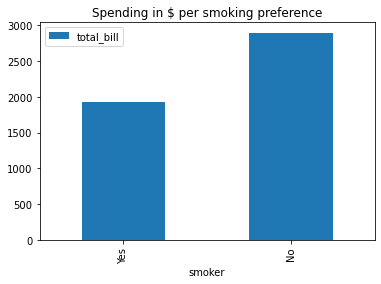

In [349]:
fumadores.plot.bar(x="smoker", y="total_bill", title="Spending in $ per smoking preference")
plt.show();

**SEABORN - sns.barplot()**

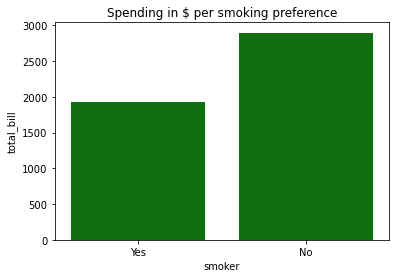

In [350]:
figura1 = sns.barplot(x="smoker", color="green", y="total_bill", data=fumadores)
figura1.set_title("Spending in $ per smoking preference")
plt.show();

**MATPLOTLIB - plt.pie()**

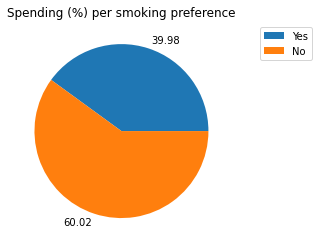

In [351]:
plt.pie(fumadores['total_bill'], labels = fumadores["billing_%"]);
plt.title("Spending (%) per smoking preference") # para poner el título
plt.legend(fumadores["smoker"], bbox_to_anchor=(1.4, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

**4. Is tip correlated to total_bill? Draw a scatter plot**

**CREO DOS DATAFRAME NUEVOS CON LA INFORMACIÓN SEPARADA POR SEXO PARA AÑADIR INFORMACIÓN A LA CORRELACION**

In [352]:
df_hombres = df[df.sex=="Male"]
df_mujeres = df[df.sex=="Female"]

**MATPLOTLIB - plt.scatter()**


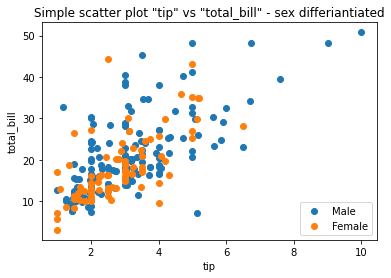

In [353]:
plt.scatter(df_hombres['tip'], df_hombres['total_bill'], label="Male")
plt.scatter(df_mujeres['tip'], df_mujeres['total_bill'], label="Female")
plt.title('Simple scatter plot "tip" vs "total_bill" - sex differiantiated')
plt.legend()
plt.xlabel("tip")
plt.ylabel("total_bill")

plt.show();

**SEABORN - sns.barplot()**

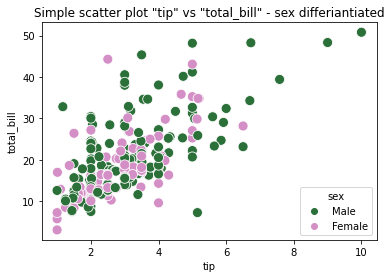

In [363]:
figura2 = sns.scatterplot('tip', 'total_bill', data = df,
                    hue = 'sex', # puntos de distintos colores en función de la variable que indiquemos
                    s = 100, # tamaño de los marcadores
                    palette = "cubehelix") # establecer el color de los puntos
figura2.set_title('Simple scatter plot "tip" vs "total_bill" - sex differiantiated')
plt.show(); 

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

In [373]:
mean_bill = df.groupby(["day","time"])["total_bill"].mean().reset_index()

pd.DataFrame(mean_bill)

,day,time,total_bill
0,Thur,Lunch,17.664754
1,Thur,Dinner,18.780000
2,Fri,Lunch,12.845714
3,Fri,Dinner,19.663333
4,Sat,Lunch,NaN
5,Sat,Dinner,20.441379
6,Sun,Lunch,NaN
7,Sun,Dinner,21.410000


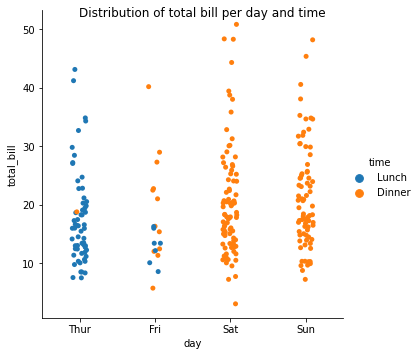

In [374]:
grafico1 = sns.catplot(x="day", y="total_bill", data=df, hue='time')
grafico1.fig.suptitle('Distribution of total bill per day and time')
plt.show()

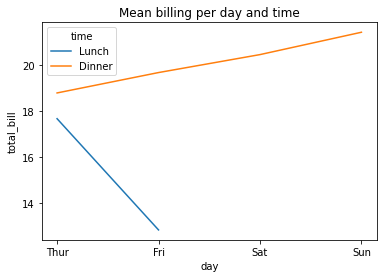

In [375]:
grafico2 = sns.lineplot(x="day", y="total_bill", data=mean_bill, hue="time")
grafico2.set_title("Mean billing per day and time")
plt.show();